## This notebook loads the data, preprocesses it, runs linear regression on the full dataset, last week, and last 8 weeks, and visualizes the results.

In [8]:
import os
import numpy as np
from utils.preprocessing import load_data, preprocess_data, filter_weeks
from utils.regression_analysis import run_regression
from utils.visualization import plot_coefficients, plot_individual_variable

# Ensure output directory exists
os.makedirs('output', exist_ok=True)

### 1. Load the Data

In [9]:
## Machine learning Superrvised regression example
# Load data
df = load_data()

Data loaded from regression test.csv
First 5 rows:
  Dispatch Date      Region District Name              Customer Name  \
0      4-Aug-25        East         Jinja             Gorreti Nagayi   
1      8-Aug-25       North          Gulu                ABER BARBRA   
2      4-Aug-25        East       Buyende                 MAIRI JOHN   
3      4-Aug-25        East        Iganga  NABULUMBA MADINA BALIKOWA   
4      8-Aug-25  North East          Lira                Okello Aron   

  DOCs Ordered DOCs Received  DOC Dead Upon Arrival  DOC Dead 1st Week  \
0          153           117                   33.0               40.0   
1          102           102                    NaN               16.0   
2          408           408                    NaN               45.0   
3          510           510                    NaN               50.0   
4          153           153                    NaN               15.0   

   first_week_mortality hatchery hatcher setter         DriverName  \
0

### 2. Preprocess the Data

In [10]:
# Parse dates, add a week column, drop rows with missing target, and fill missing predictors with 'Unknown'.
# Define dependent and independent variables
y_col = "first_week_mortality"
x_cols = ["hatchery", "hatcher", "setter", "DriverName", 
          "VehicleNumber", "source_of_eggs", "CustomerType"]

df = preprocess_data(df, y_col, x_cols)

print("Independent variables:", x_cols)
print("NaNs in y:", df[y_col].isna().sum())
print("NaNs in X columns:\n", df[x_cols].isna().sum())
print(f"Data shape after dropping NaN y rows: {df.shape}")

Independent variables: ['hatchery', 'hatcher', 'setter', 'DriverName', 'VehicleNumber', 'source_of_eggs', 'CustomerType', 'Week']
NaNs in y: 0
NaNs in X columns:
 hatchery          0
hatcher           0
setter            0
DriverName        0
VehicleNumber     0
source_of_eggs    0
CustomerType      0
Week              0
dtype: int64
Data shape after dropping NaN y rows: (492, 19)


/workspaces/Regression_mortality/utils/preprocessing.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x_cols] = df[x_cols].fillna('Unknown')


### 3. Week-Based Filtering

In [11]:
# Create subsets for the most recent week and the last 8 weeks.
df_last_week, df_last_8_weeks = filter_weeks(df)

### 4. Regression & Coefficient Plots

In [12]:
# Run OLS regression on each subset and save a horizontal bar chart of the top 15 significant coefficients (p < 0.05).


# Full dataset
print("\nRunning regression on full dataset...")
model_full, _, _ = run_regression(df, x_cols, y_col, "Full_Dataset")


# Last week
print("\nRunning regression on last week...")
model_last_week, _, _ = run_regression(df_last_week, x_cols, y_col, "Last_Week")


# Last 8 weeks
print("\nRunning regression on last 8 weeks...")
model_last_8_weeks, _, _ = run_regression(df_last_8_weeks, x_cols, y_col, "Last_8_Weeks")



Running regression on full dataset...

Full_Dataset Regression Summary:
                             OLS Regression Results                             
Dep. Variable:     first_week_mortality   R-squared:                       0.096
Model:                              OLS   Adj. R-squared:                  0.037
Method:                   Least Squares   F-statistic:                     1.628
Date:                  Thu, 02 Oct 2025   Prob (F-statistic):             0.0207
Time:                          20:37:44   Log-Likelihood:                 1171.7
No. Observations:                   492   AIC:                            -2281.
Df Residuals:                       461   BIC:                            -2151.
Df Model:                            30                                         
Covariance Type:              nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------

R-squared: 0.096—Only 9.6% of variation in mortality is explained by the independent variables. 

Adj. R-squared: 0.037—Even lower (3.7%) after penalizing for 30+ variables; indicates the model isn't worth the complexity—many variables add noise.

F-statistic: 1.628, Prob (F-statistic): 0.028—Overall model is significant (p<0.05), so the independent variables collectively matter (not pure chance), but weakly.

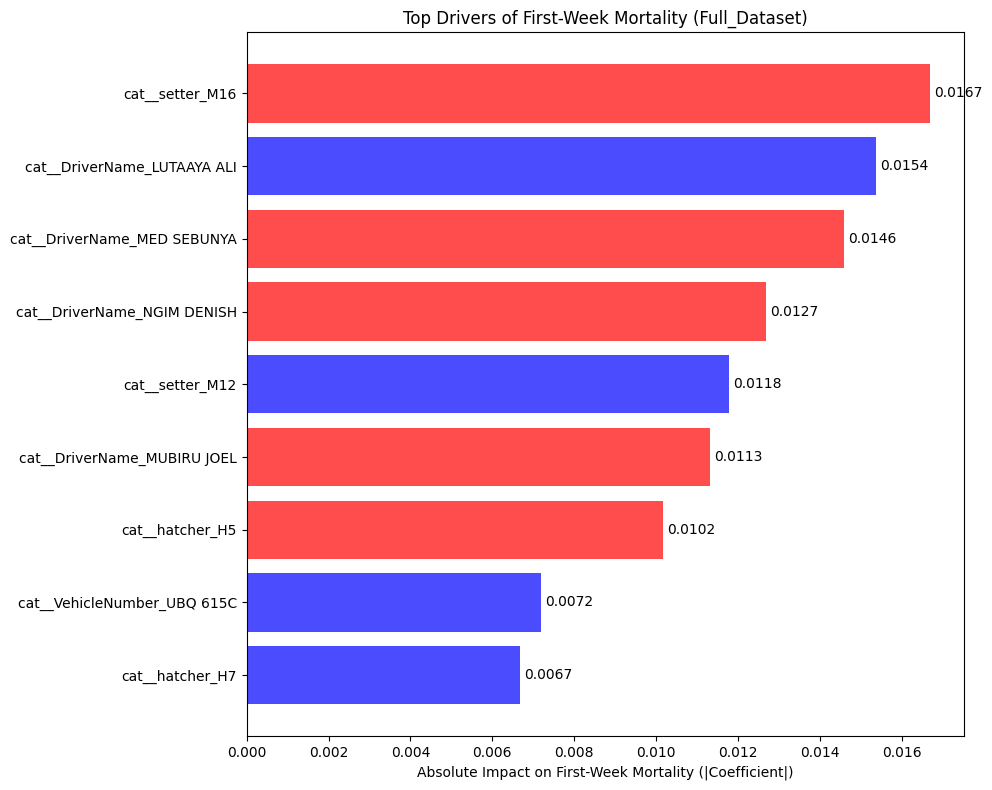

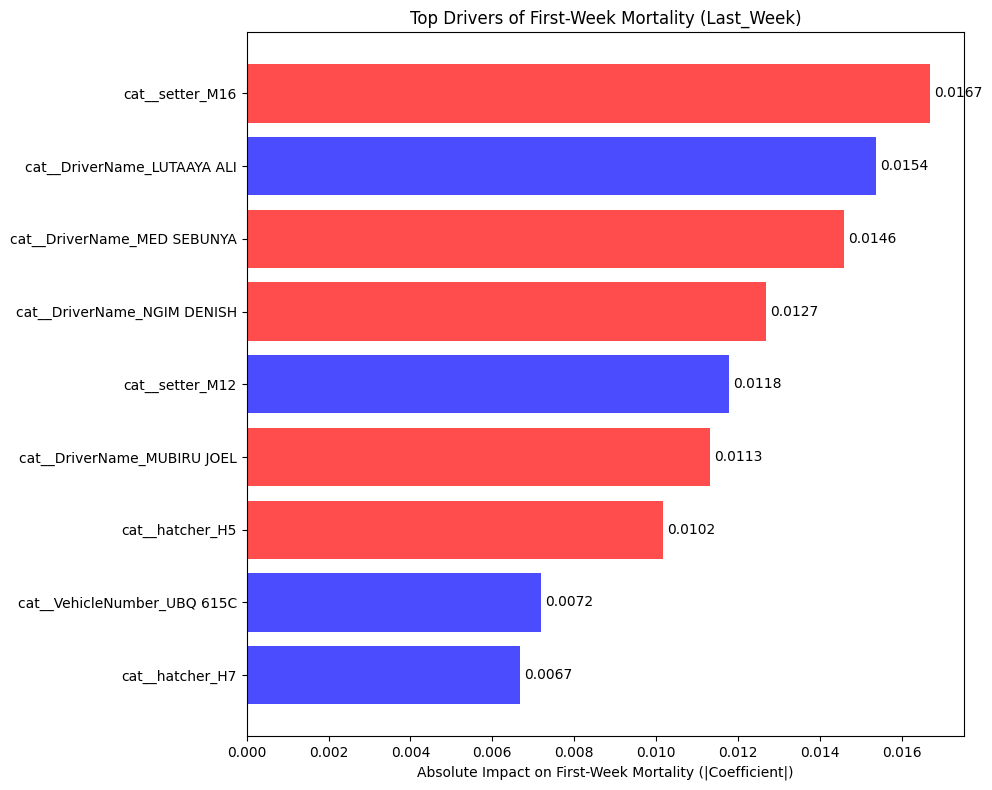

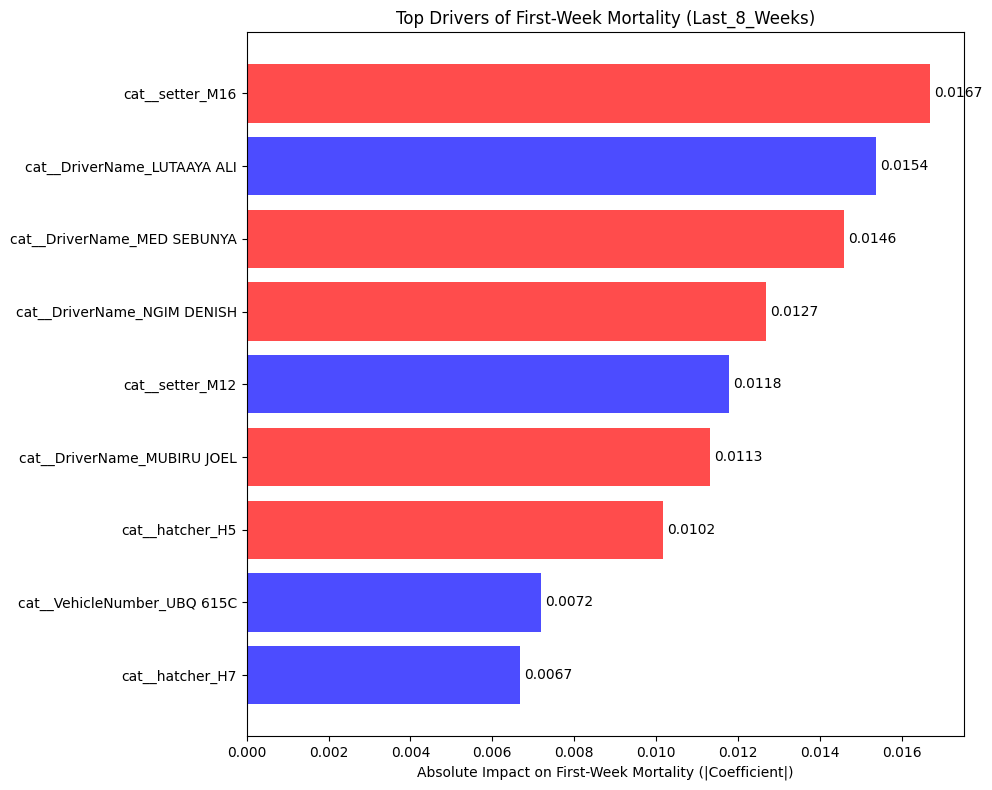

In [13]:
plot_coefficients(model_full, None, "Full_Dataset")  # Feature names not needed for plot
plot_coefficients(model_last_week, None, "Last_Week")
plot_coefficients(model_last_8_weeks, None, "Last_8_Weeks")

### 5. Individual Variable Visualization


Plotting hatchery distribution...


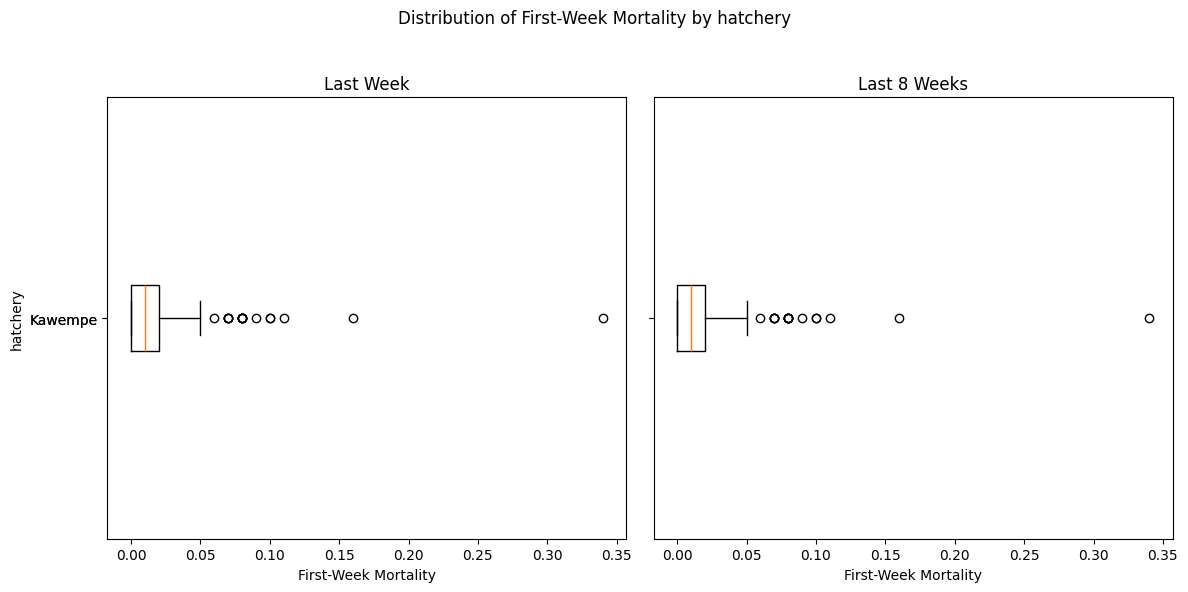

In [14]:
print("\nPlotting hatchery distribution...")
plot_individual_variable(df_last_week, df_last_8_weeks, 'hatchery', y_col)